In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector

In [2]:
circ1 = QuantumCircuit(2,1)

#uncomment below to start in the |1> state
#circ1.initialize([0,1], 0)

#simulating the state vector
sim = Aer.get_backend('statevector_simulator')
result_sv1 = execute(circ1, backend = sim).result()
state_vec1 = result_sv1.get_statevector()
# plot_bloch_multivector(state_vec1)

In [41]:
def form_circuit(beta, gamma, J, mu, n_qubits, pbc=True):
    """
    Form the circuit for adiabatic evolution
    
        H = -J\sum_{ij} \sigma_i^z \sigma_j^z + \mu\sum_i\sigma_i^z
    """
    depth = len(beta)
    assert(len(beta) == len(gamma))
    
    # create circuit
    circ = QuantumCircuit(n_qubits,0)
    
    # add layer of hadamard gates
    for i in range(n_qubits):
        circ.h(i)
        
    for layer in range(depth):
        for i in range(n_qubits):
            circ.rx(beta[layer],i)
        for i in range(n_qubits-1):
            circ.rzz(gamma[layer]*J,i,(i+1))
        if pbc:
            circ.rzz(gamma[layer]*J,n_qubits-1,0)

        for i in range(n_qubits):
            circ.rz(gamma[layer]*mu,i)
    return circ    


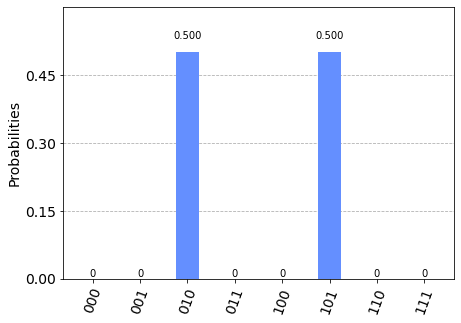

In [74]:
# create the adiabatic parameters
n_steps = 30
beta = []
gamma = []
for i in range(n_steps+1):
    beta.append(1-i/n_steps)
    gamma.append(i/n_steps)

circ = form_circuit(beta, gamma, -2, 0, 3, pbc=False)
circ.draw(output="mpl")

sim = Aer.get_backend('statevector_simulator')
result_sv = execute(circ, backend = sim).result()
state_vec = result_sv.get_statevector()
plot_histogram(result_sv.get_counts(circ))


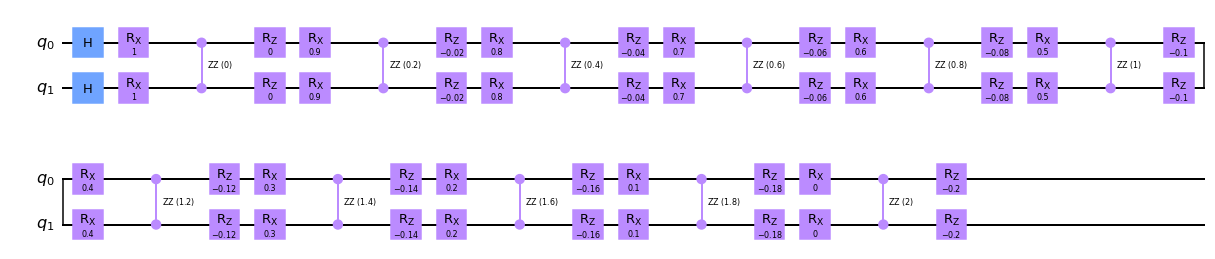

In [51]:
circ = QuantumCircuit(2,0)

# t = .2
J = 2
mu = -.2
#simulating the state vector
circ.h(0)
circ.h(1)

n_steps = 10
for i in range(n_steps+1):
    a = 1-i/n_steps
    b = i/n_steps
    # print(a,b)
    circ.rx(a,0)
    circ.rx(a,1)
    circ.rzz(b*J,0,1)
    circ.rz(b*mu,0)
    circ.rz(b*mu,1)
    
# circ.draw()
circ.draw(output="mpl")


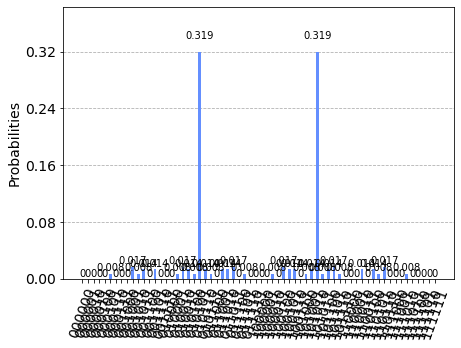

In [49]:

#
sim = Aer.get_backend('statevector_simulator')
result_sv = execute(circ, backend = sim).result()
state_vec = result_sv.get_statevector()
# print(state_vec)
plot_histogram(result_sv.get_counts(circ)) #approximately 50/50
# plot_bloch_multivector(state_vec)

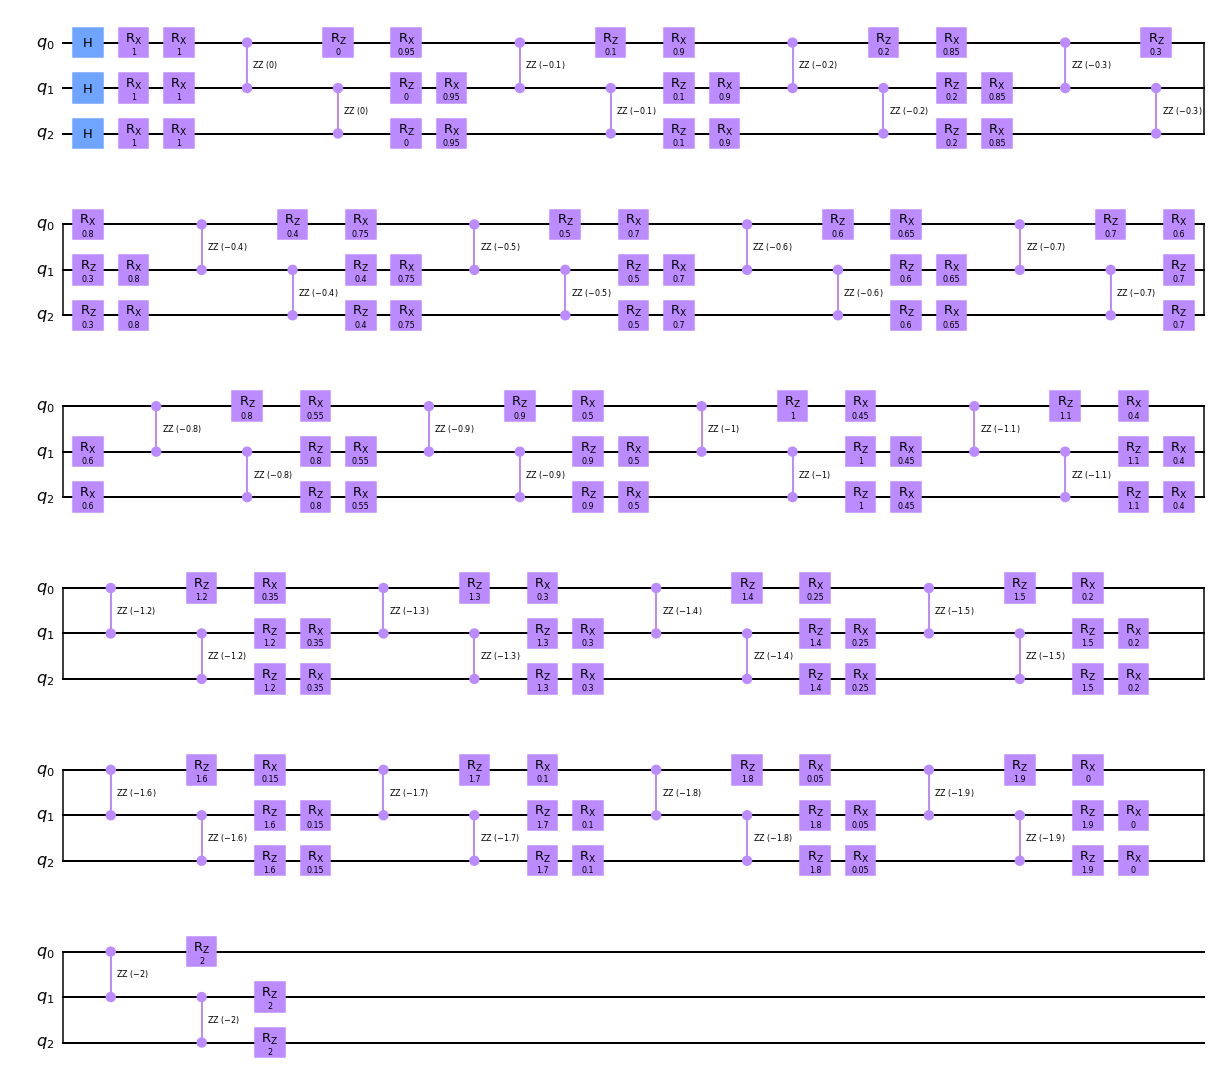

In [17]:
circ = QuantumCircuit(3,0)

# t = .2
J = -2
mu = 2
#simulating the state vector
circ.h(0)
circ.h(1)
circ.h(2)

circ.rx(1,0)
circ.rx(1,1)
circ.rx(1,2)

n_steps = 20
for i in range(n_steps+1):
    a = 1-i/n_steps
    b = i/n_steps
    # print(a,b)
    circ.rx(a,0)
    circ.rx(a,1)
    circ.rx(a,2)
    circ.rzz(b*J,0,1)
    circ.rzz(b*J,1,2)
    # circ.rzz(b*J,2,0)
    circ.rz(b*mu,0)
    circ.rz(b*mu,1)
    circ.rz(b*mu,2)

circ.draw(output="mpl")
# circ.draw(output="latex", filename="out.pdf")


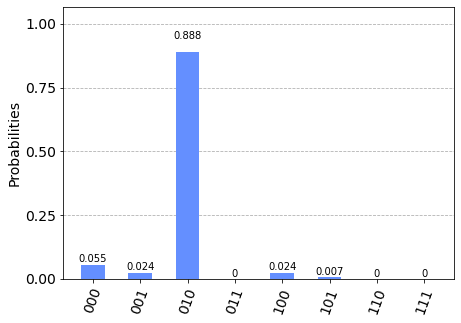

In [18]:
#
sim = Aer.get_backend('statevector_simulator')
result_sv = execute(circ, backend = sim).result()
state_vec = result_sv.get_statevector()
# print(state_vec)
plot_histogram(result_sv.get_counts(circ)) #approximately 50/50


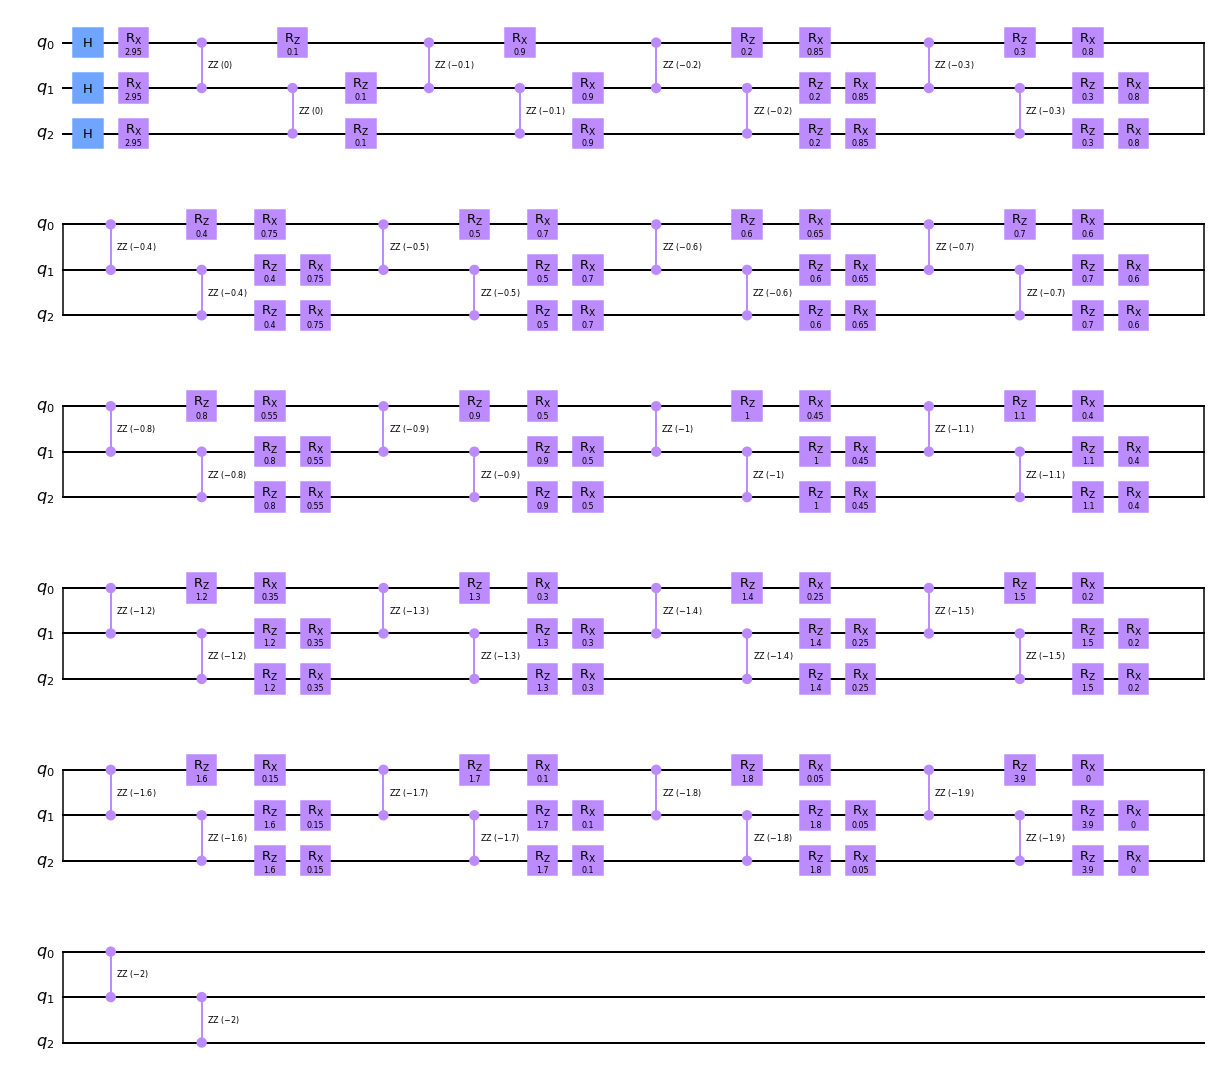

In [19]:
from qiskit.quantum_info import Operator
from qiskit.compiler import transpile
result = transpile(circ, optimization_level=3)
result.draw(output='mpl')

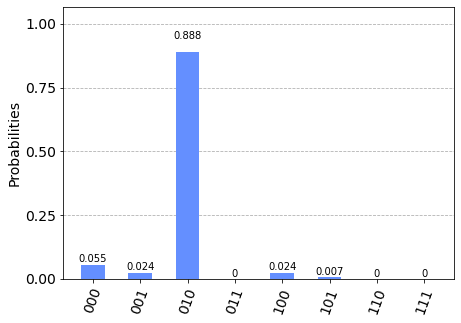

In [20]:
#
sim = Aer.get_backend('statevector_simulator')
result_sv = execute(circ, backend = sim).result()
state_vec = result_sv.get_statevector()
# print(state_vec)
plot_histogram(result_sv.get_counts(circ)) #approximately 50/50
